# Determining initial $T_{\rm eff}$ and luminosity for DMESTAR seed polytropes

Currently, we are having difficulty with models in the mass range of $0.14 M_{\odot}$ -- $0.22 M_{\odot}$ not converging after an initial relaxation. There are several potential candidates for why the models are not converging. The first is FreeEOS is running with a set of plasma properties (pressure, temperature) that are outside of it's typical working range. I suspect this is not the case, as lower mass models converge properly, despite having cooler temperatures. Other potential candidates are the seed luminosity and $T_{\rm eff}$ supplied to $\texttt{newpoly}$ for computation of an initial polytrope model that DMESTAR then relaxes before a full stellar evolution run. To test this idea, we can compare model properties for the seed polytropes with the final relaxed quantities determined by DMESTAR.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Current seed values

Scripts used to generate a new polytrope for DMESTAR models rely on a piece-wise function to generate an appropriate combination of $T_{\rm eff}$ and luminosity for a model based on the requested stellar mass and solar composition. That piece-wise function is 
\begin{align}
    \log(T) & = 3.64 & M \ge 3.9 \\
    \log(L) & = 0.2\cdot (M - 5.0) + 2.6 & \\
     & \\
    \log(T) & = -0.028\cdot M + 3.875 & 3.9 > M \ge 3.0 \\
    \log(L) & =  0.55 \cdot M + 0.1   & \\ 
     & \\
    \log(T) & =  0.039\cdot M + 3.5765 & 3.0 > M \ge 1.5 \\
    \log(L) & =  1.7  & \\
     & \\
    \log(T) & =  0.039\cdot M + 3.5765 & 1.5 > M \ge 0.23 \\
    \log(L) & =  0.85\cdot M + 0.4  & \\
     & \\
    \log(T) & =  0.614\cdot M + 3.3863 & 0.23 > M \\
    \log(L) & = -0.16877\cdot M - 0.117637  & \\
\end{align}
While models with masses below $0.23 M$ are found to converge, the greatest issues occur right in the vicinity of the final piecewise condition. We can view this graphically,

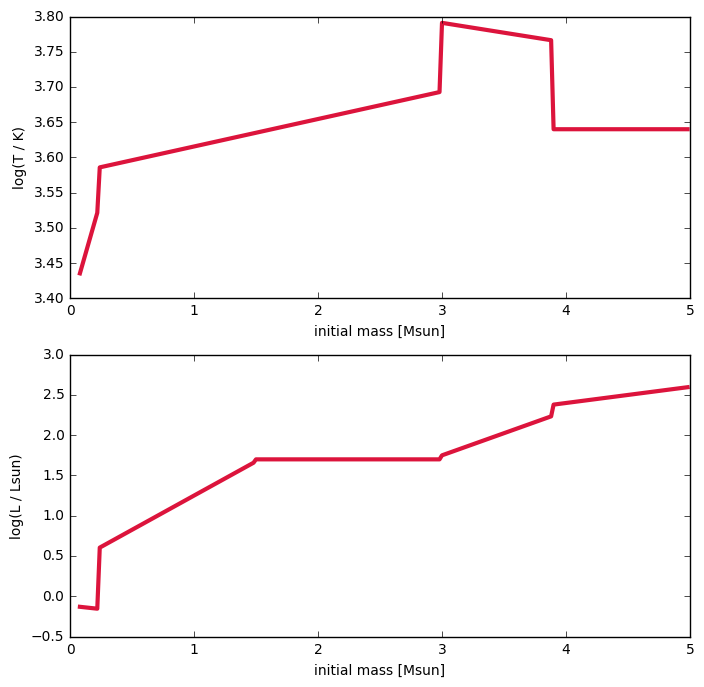

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

masses = np.arange(0.08, 5.0, 0.02)

# compute and plot temperature relationship
p1 = [3.64 for m in masses if m >= 3.9]
p2 = [-0.028*m + 3.875 for m in masses if 3.9 > m >= 3.0]
p3 = [0.039*m + 3.5765 for m in masses if 3.0 > m >= 0.23]
p4 = [0.614*m + 3.3863 for m in masses if m < 0.23]
tr = p4 + p3 + p2 + p1

ax[0].set_xlabel("initial mass [Msun]")
ax[0].set_ylabel("log(T / K)")

ax[0].plot(masses, tr, '-', c='#dc143c', lw=3)

# plot luminosity relationship
# compute and plot temperature relationship
p1 = [0.2*(m - 5.0) + 2.6 for m in masses if m >= 3.9]
p2 = [0.55*m + 0.1 for m in masses if 3.9 > m >= 3.0]
p3 = [1.7 for m in masses if 3.0 > m >= 1.5]
p4 = [0.85*m + 0.4 for m in masses if 1.5 > m >= 0.23]
p5 = [-0.16877*m - 0.117637 for m in masses if m < 0.23]
lr = p5 + p4 + p3 + p2 + p1

ax[1].set_xlabel("initial mass [Msun]")
ax[1].set_ylabel("log(L / Lsun)")

ax[1].plot(masses, lr, '-', c='#dc143c', lw=3)

## Relaxed model values

We can compare the relationship(s) quoted above with model values for temperature and luminosity after the model has relaxed to a stable configuration. This takes only a couple time steps to achieve, so we will look at the model relationship during the third time step for all models with masses between 0.08 and 5.0 Msun. Models are taken from a recent study where we used the most up-to-date version of the Dartmouth models for young stars (Feiden 2016).

In [29]:
model_directory = "../../papers/MagneticUpperSco/models/trk/std/"

# get all file names
from os import listdir
all_fnames = listdir(model_directory)

# sort out only those file names that end in .trk
fnames = [f for f in all_fnames if f[-4:] == ".trk"]

# sort numerically
fnames = sorted(fnames)

To select which model time step is most representative of a relaxed model, we can step through the first 50 iterations to find if there are any noticable jumps in model properties.

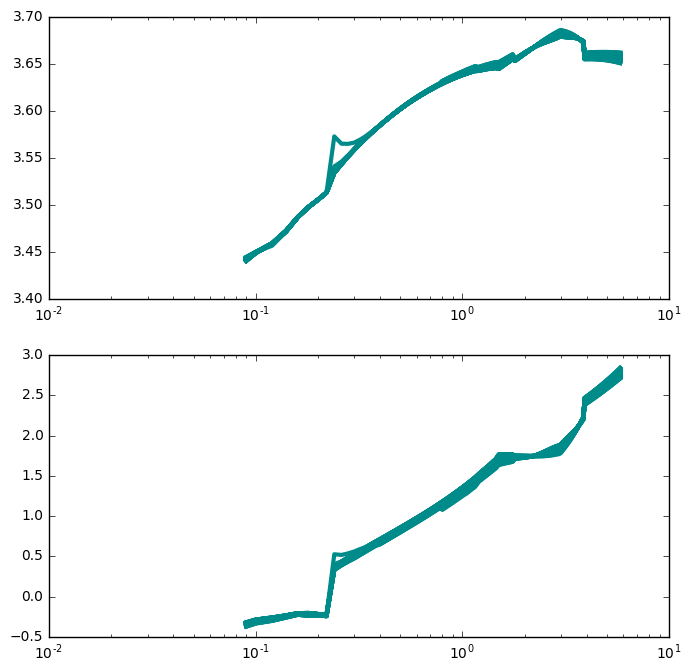

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

model_props = np.empty((len(fnames), 3))
for j in range(0, 50):
    for i, f in enumerate(fnames):
        model_props[i, 0] = float(f[1:5])/1000.0
    
        try:
            trk = np.genfromtxt(model_directory + f, usecols=(0, 1, 2, 3))
        except ValueError:  
            model_props[i, 1] = 0.0    # temperature
            model_props[i, 2] = 0.0    # luminosity
            continue
        
        model_props[i, 1] = trk[j, 1]  # temperature
        model_props[i, 2] = trk[j, 3]  # luminosity

    ax[0].semilogx(model_props[:,0], model_props[:,1], '-', c='#008b8b', lw=3)
    ax[1].semilogx(model_props[:,0], model_props[:,2], '-', c='#008b8b', lw=3)


We can now iterate through these filenames and save the third timestep to an array.

In [51]:
model_props = np.empty((len(fnames), 3))
for i, f in enumerate(fnames):
    model_props[i, 0] = float(f[1:5])/1000.0
    
    try:
        trk = np.genfromtxt(model_directory + f, usecols=(0, 1, 2, 3))
    except ValueError:  
        model_props[i, 1] = 0.0    # temperature
        model_props[i, 2] = 0.0    # luminosity
        continue
        
    model_props[i, 1] = trk[1, 1]  # temperature
    model_props[i, 2] = trk[1, 3]  # luminosity

Plotting these two relations, we can compare against the function used to generate the polytrope seed model.

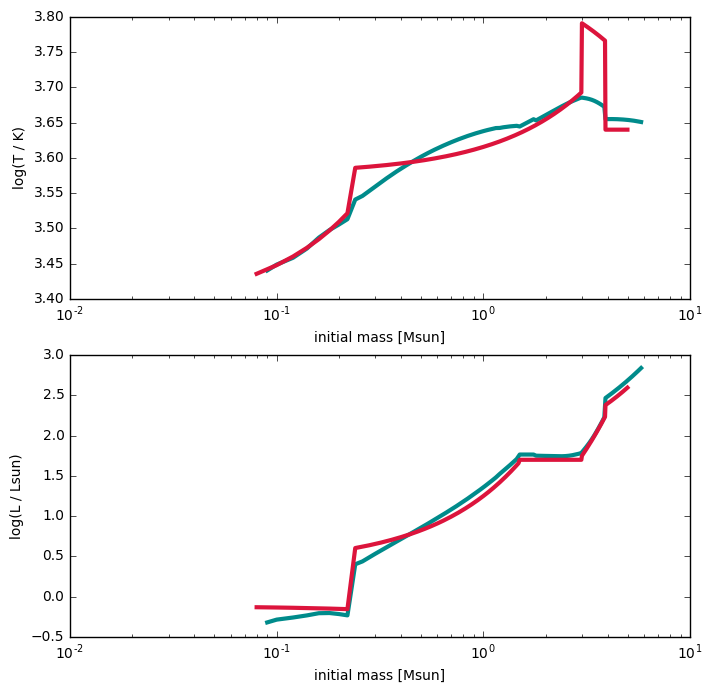

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

masses = np.arange(0.08, 5.0, 0.02)

ax[0].set_xlabel("initial mass [Msun]")
ax[0].set_ylabel("log(T / K)")

ax[0].semilogx(model_props[:,0], model_props[:,1], '-', c='#008b8b', lw=3)
ax[0].semilogx(masses, tr, '-', c='#dc143c', lw=3)

ax[1].set_xlabel("initial mass [Msun]")
ax[1].set_ylabel("log(L / Lsun)")

ax[1].semilogx(model_props[:,0], model_props[:,2], '-', c='#008b8b', lw=3)
ax[1].semilogx(masses, lr, '-', c='#dc143c', lw=3)

There are clear discrepancies, particularly in the low-mass regime. However, we note there are significant differences in relaxed effective temperatures starting around 1.5 solar masses. Luminosities tend to trace the relaxed models quite well until approximately 0.4 Msun. Since these are logarithmic values, noticeable differences are quite sizeable when it comes to model adjustments during runtime. It's quite likely that corrections will exceed tolerances in the allowed parameter adjustments during a model's evolution.

### Effective temperature




In [69]:
tp1 = np.array([line for line in model_props if line[0] < 0.23])
tp2 = np.array([line for line in model_props if 0.23 <= line[0] < 1.5])

tpoly1 = np.polyfit(tp1[:,0], tp1[:,1], 2)
tpoly2 = np.polyfit(tp2[:,0], tp2[:,1], 3)

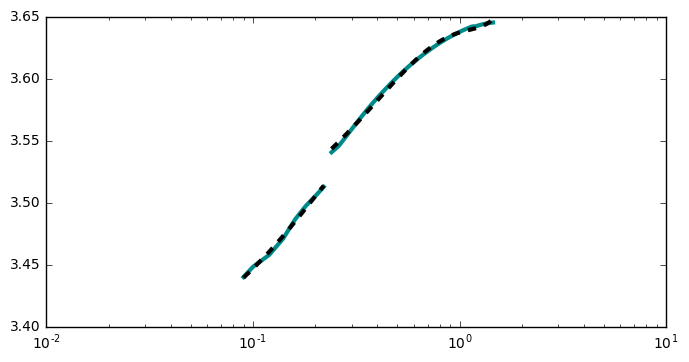

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.semilogx(tp1[:,0], tp1[:,1], '-', c='#008b8b', lw=3)
ax.semilogx(tp2[:,0], tp2[:,1], '-', c='#008b8b', lw=3)
ax.semilogx(tp1[:,0], tpoly1[0]*tp1[:,0]**2 + tpoly1[1]*tp1[:,0] + tpoly1[2], '--', c='black', lw=3)
ax.semilogx(tp2[:,0], tpoly2[0]*tp2[:,0]**3 + tpoly2[1]*tp2[:,0]**2 + tpoly2[2]*tp2[:,0] + tpoly2[3], '--', c='black', lw=3)

### Luminosity

Above 1.5 Msun, there appear to be very little deviations of the true model sequence from the initial seed model sequence. We can thus leave this parameteriztion alone. Below 1.5 Msun, we can alter the shape of the relationship down to 0.23 Msun. In addition, we can prescribe a new shape to the relationship for objects with masses below 0.23 Msun.

In [55]:
p1 = np.array([line for line in model_props if line[0] < 0.23])
p2 = np.array([line for line in model_props if 0.23 <= line[0] < 1.5])

poly1 = np.polyfit(p1[:,0], p1[:,2], 2)
poly2 = np.polyfit(p2[:,0], p2[:,2], 2)

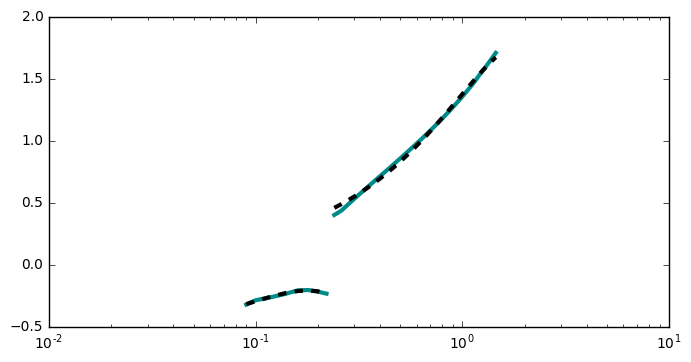

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.semilogx(p1[:,0], p1[:,2], '-', c='#008b8b', lw=3)
ax.semilogx(p2[:,0], p2[:,2], '-', c='#008b8b', lw=3)
ax.semilogx(p1[:,0], poly1[0]*p1[:,0]**2 + poly1[1]*p1[:,0] + poly1[2], '--', c='black', lw=3)
ax.semilogx(p2[:,0], poly2[0]*p2[:,0]**2 + poly2[1]*p2[:,0] + poly2[2], '--', c='black', lw=3)

## Implementation

These new fits better represent the relaxed models, but will they work when implemented as seed values? 

In [71]:
print "log(T) and log(L) Coefficients for the lowest mass objects: \n", tpoly1, poly1
print "\n\nlog(T) and log(L) Coefficients for low mass objects: \n", tpoly2, poly2

log(T) and log(L) Coefficients for the lowest mass objects: 
[-1.27192877  0.9650018   3.36316571] [-14.33705482   5.09735054  -0.6592411 ]


log(T) and log(L) Coefficients for low mass objects: 
[ 0.11365404 -0.38799192  0.45719128  3.45458154] [-0.45439653  1.7710227   0.06103889]


The new parameterization had no influence over model convergence.

## UPDATE

Error appears to have been due to a value (JCORE) being read or set to zero erroneously. Since it is used to define an array index later in the routine (STARIN), a memory reference error was thrown and SEGFAULT initiated. A temporary fix has been issued.